In [3]:
%matplotlib inline

In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
from PIL import Image
from scipy.signal import convolve2d
import cv2

In [ ]:
def show_difference(image, kernel):
    convolved = convolve2d(image, kernel)
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(121)
    plt.title('Original image')
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    
    plt.subplot(122)
    plt.title('Convolved image')
    plt.axis('off')
    plt.imshow(convolved, cmap='gray')
    return convolved

## Filters
https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [ ]:
dog_image = cv2.imread('./dog.jpg')
dog_image = cv2.cvtColor(dog_image, cv2.COLOR_BGR2GRAY)

# 橫向 edge detection
kernel = np.array([[1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
dx = show_difference(dog_image, kernel)

In [ ]:
# 縱向 edge detection
kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
dy = show_difference(dog_image, kernel)

## Sobel Operator

https://zh.wikipedia.org/wiki/%E7%B4%A2%E8%B2%9D%E7%88%BE%E7%AE%97%E5%AD%90

In [ ]:
mag = np.hypot(dx, dy)
mag *= 255.0 / np.max(mag)

fig = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.title('Original image')
plt.axis('off')
plt.imshow(dog_image, cmap='gray')
    
plt.subplot(122)
plt.title('Convolved image')
plt.axis('off')
plt.imshow(mag, cmap='gray')


In [ ]:
# 銳利化
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
_ = show_difference(dog_image, kernel)

In [ ]:
# 高斯模糊
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32)
_ = show_difference(dog_image, kernel)

# 視覺化 Convolution2D layer

In [4]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D

(500, 332, 3)
Original photo


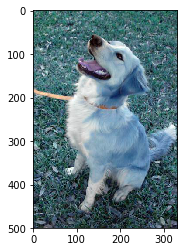

In [5]:
dog = cv2.imread('./dog.jpg')
print(dog.shape)
print("Original photo")
plt.imshow(dog)

In [10]:
# create model
model = Sequential()
model.add(Conv2D(3, 
                 (15,15), 
                 padding="same", 
                 data_format="channels_last", 
                 input_shape=dog.shape))
model.add(Activation("relu"))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 500, 332, 3)       2028      
_________________________________________________________________
activation_2 (Activation)    (None, 500, 332, 3)       0         
Total params: 2,028
Trainable params: 2,028
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
dog_batch = np.expand_dims(dog, axis=0)
print(dog_batch.shape)

(1, 500, 332, 3)


(1, 500, 332, 3)
(500, 332, 3)


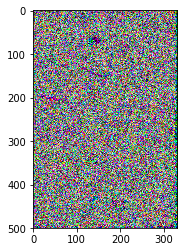

In [12]:
conv_dog = model.predict(dog_batch)
print(conv_dog.shape)
img = np.squeeze(conv_dog, axis=0)
print(img.shape)
plt.imshow(img)

In [13]:
def show_img(model, img):
    plt.figure(figsize=(8, 8))
    img_batch = np.expand_dims(img, axis=0)
    conv_img = model.predict(img_batch)
    conv_img = np.squeeze(conv_img, axis=0)
    print(conv_img.shape)
    conv_img = conv_img.reshape(conv_img.shape[:2])
    plt.imshow(conv_img)

(500, 332, 1)


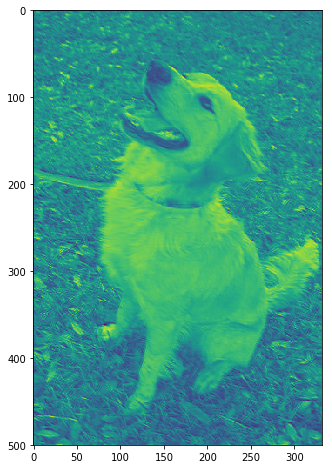

In [17]:
model = Sequential()
model.add(Conv2D(1, 
                 (3, 3),
                padding="same",
                data_format="channels_last", 
                input_shape=dog.shape))
show_img(model, dog)

(500, 332, 1)


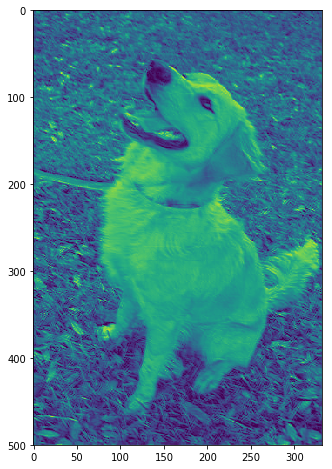

In [18]:
model.add(Activation("relu"))
show_img(model, dog)

(50, 33, 1)


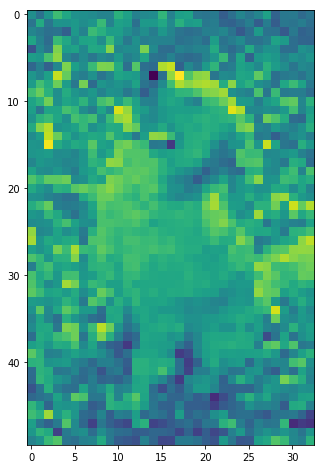

In [19]:
model.add(MaxPooling2D(pool_size=(10,10), 
                       data_format="channels_last"))

show_img(model, dog)